# Detect non-stationarity
### Test for the null-hypothesis - it is non-stationary

In [15]:
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from matplotlib import rcParams
import pandas as pd


In [20]:

tps_july = pd.read_csv(
    "train.csv", parse_dates=["date_time"], index_col="date_time"
)
test_results = adfuller(tps_july["target_carbon_monoxide"])

test_results[1]




7.263413572494168e-15

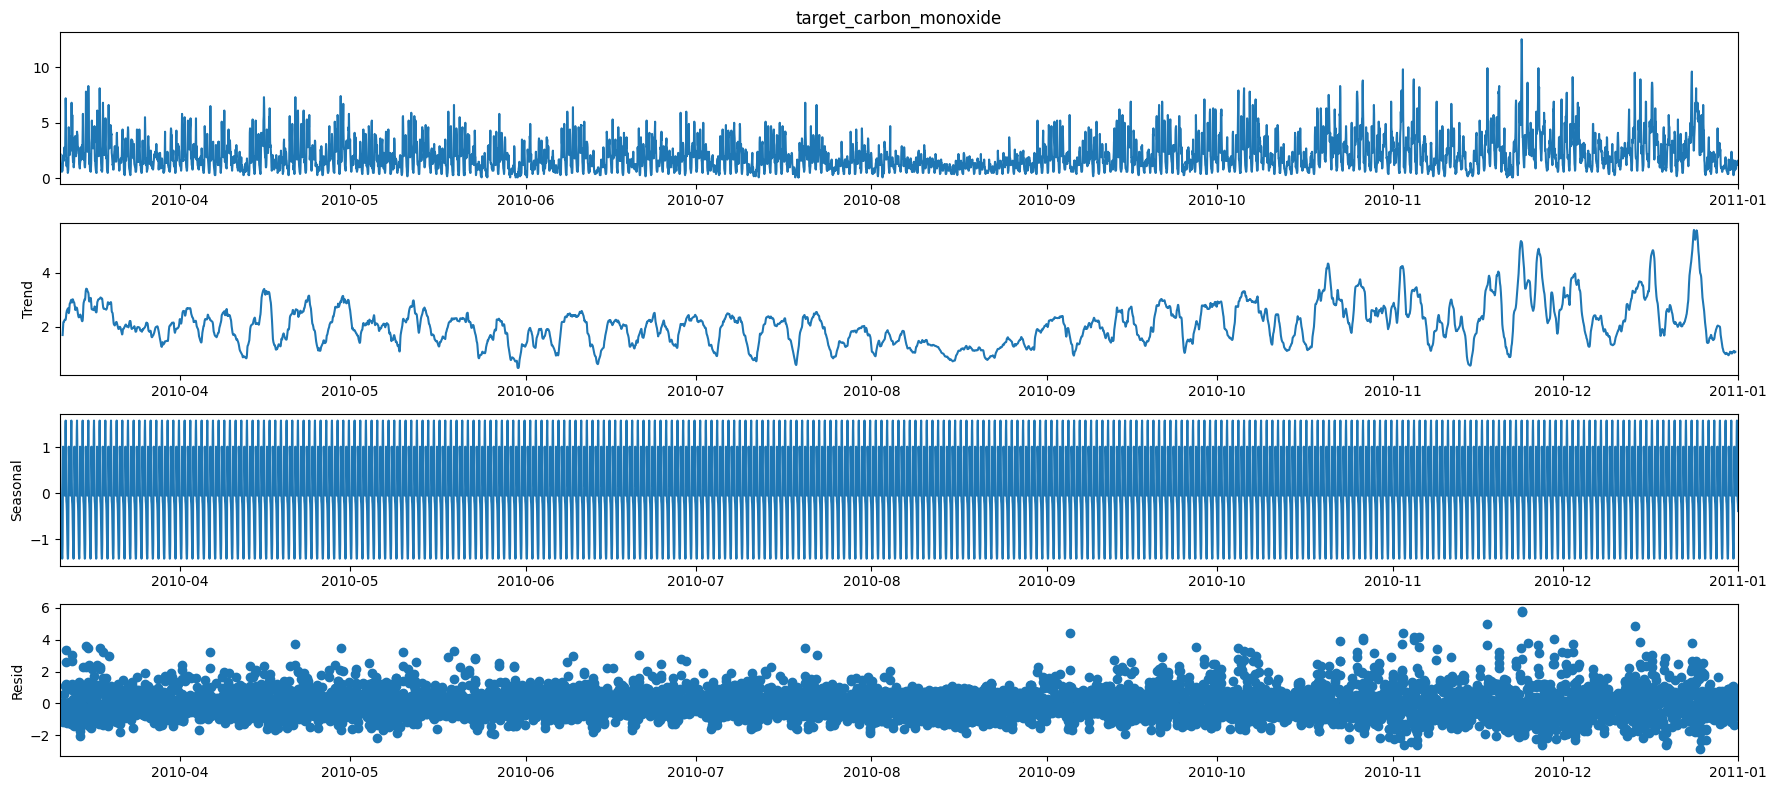

In [22]:
# plot seasonal decomposition
rcParams["figure.figsize"] = 18, 8
decomposition = sm.tsa.seasonal_decompose(tps_july["target_carbon_monoxide"], model="additive")
fig = decomposition.plot()

# Load stock price data

<Axes: xlabel='Date'>

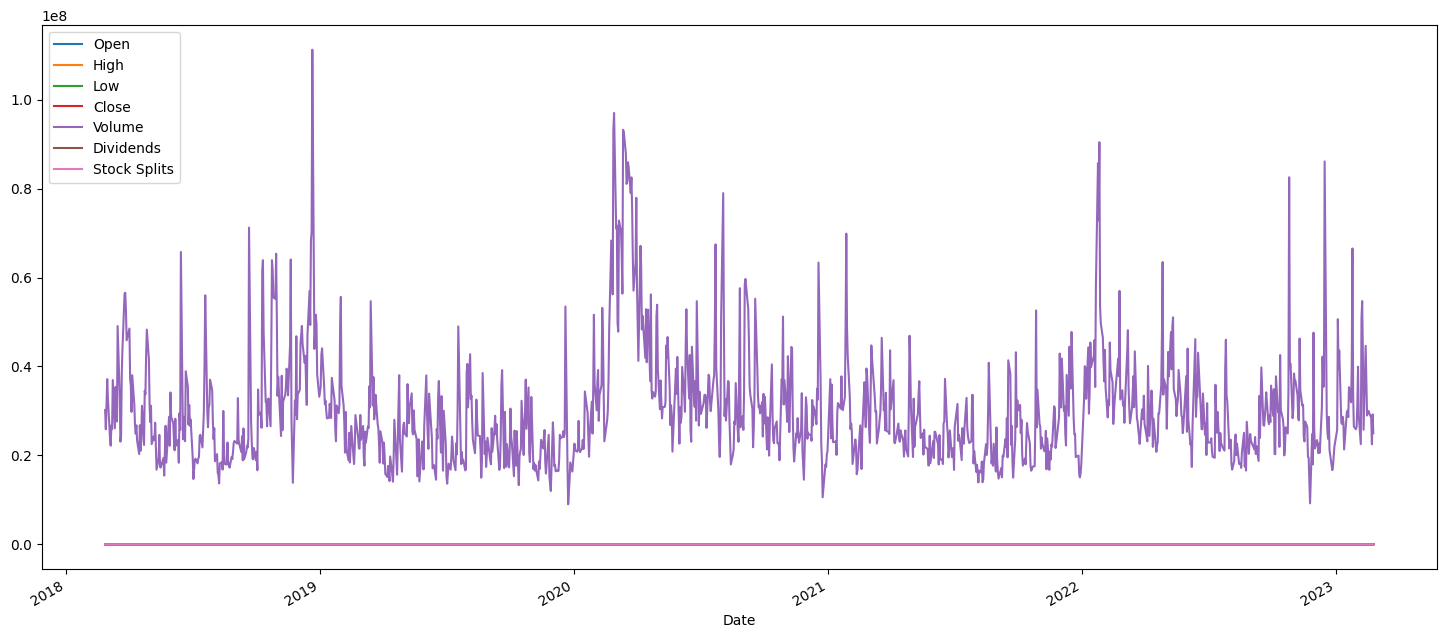

In [24]:
# load msft5yr.csv and plot the data
msft = pd.read_csv("msft5yr.csv", parse_dates=["Date"], index_col="Date")
msft.plot()


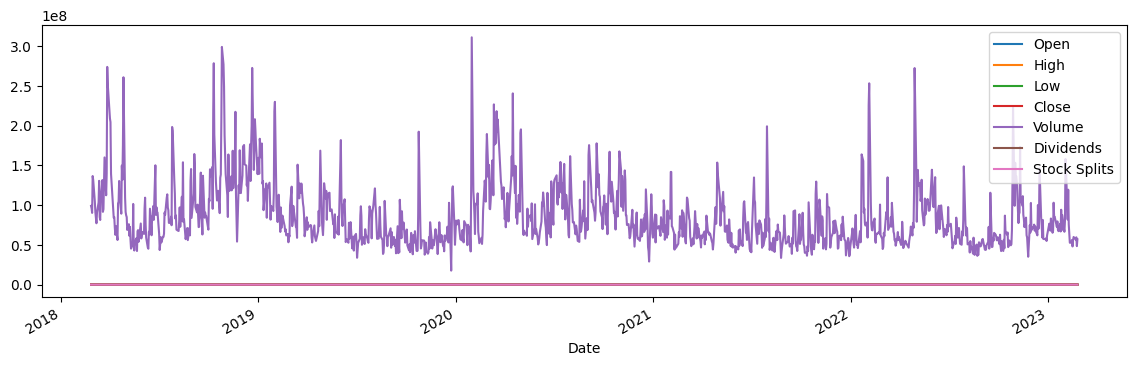

In [23]:
amzn = pd.read_csv(
    "amzn5yr.csv",
    parse_dates=["Date"],
    index_col="Date",
)

amzn.plot(figsize=(14, 4));

# Read Meat data from /meat


In [35]:
# read data from ./meat/beefhistory.csv
beef = pd.read_csv("./meat/beefhistory.csv" , parse_dates=["YEAR"], index_col="YEAR")
beef.head()
# get column names
beef.columns
# plot the data


Index(['POUNDS GRADED', 'PRIME', '%', 'CHOICE', '%.1', 'SELECT', '%.2',
       'STNDRD', '%.3', 'COMRCL', '%.4', 'UTILITY', '%.5', 'CUTTER', '%.6',
       'CANNER', '%.7', 'S/H', '%  of FEDERAL  SLAUGHTER\t BEEF', 'Y1', '%.8',
       'Y2', '%.9', 'Y3', '%.10', 'Y4', '%.11', 'Y5', '%.12'],
      dtype='object')